In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
students_df = pd.read_csv('data/StudentsPerformance.csv', sep = ',')
# можно использовать ссылку на файл
#df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv', sep = ',')

display(students_df.head())

# типы признаков
display(students_df.dtypes)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [3]:
# найдём среднее значение writing score в зависимости от пола
#display(df.groupby('gender')['writing score'].mean())
students_df.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [4]:
# отберем первые 5 наблюдений и первые 3 признака
students_df.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [5]:
# отберем наблюдения 1 и 3 и последние 3 признака
students_df.iloc[[0,2], [-3, -2, -1]]

,math score,reading score,writing score
0,72,72,74
2,90,95,93


In [7]:
# создадим новый DataFrame, в который положим отдельные строки и присвоим им именные индексы
students_df_new = students_df.iloc[[0, 3, 4, 7, 8]]
students_df_new.index = ['Cersei', 'Tywin', 'Gregor', 'Joffry', 'Ilyn Payne']
display(students_df_new)
# Индексы стали более содержательными. Это своего рода информация о каждом студенте, например - имя студента. Теперь можно по лейблу обращаться к строкам. 
#Тип объекта индекс - это Series, то есть одномерный массив


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffry,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [ ]:
# отобразим ппизнаки "пол" и "writing score" для строк с индексами 'Cersei' и 'Joffry'
students_df_new.loc[['Cersei','Joffry'],['gender','writing score']]

,gender,writing score
Cersei,female,74
Joffry,male,39


# 2. Serties и DataFrame
---

In [ ]:
# создадим объект Series
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [ ]:
# добавим именные индексы
pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [ ]:
# создадим Датафрейм из Серий
series_1 = pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])
series_2 = pd.Series([4, 5, 6], index=['Cersei', 'Tywin', 'Gregor'])
pd.DataFrame({
    'title_1': series_1, 
    'title_2': series_2 
})

,title_1,title_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


In [ ]:
# обратимся к серии
display(students_df['gender'])  # или df.gender

# обратимся к DataFrame
display(students_df[['gender']])

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

,gender
0,female
1,female
2,female
3,male
4,male
...,...
995,female
996,male
997,female
998,female


In [ ]:
display(students_df.head(8))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [8]:
type(students_df.index)

pandas.core.indexes.range.RangeIndex

# 1.5 Фильтрация
---

In [47]:
# отфильтруем оценки женщин 
print(f"оценки женщин") #{(students_df.gender == 'female').head()}
display(students_df.loc[students_df.gender == 'female'].head())

print(' ')
# отфильтруем оценки женщин по письму и чтению
#print(f"оценки женщин по письму и чтению: \n{(students_df.gender == 'female', ['reading score', 'writing score'])}")

print(f"оценки женщин по письму и чтению:") 
display(students_df.loc[students_df.gender == 'female', ['gender', 'writing score']].head(7))

оценки женщин


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


 
оценки женщин по письму и чтению:


,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
9,female,50
12,female,73


In [60]:
# Отберём такие строки, у которых значение writing score превышает среднее значение в этом dataframe.

#students_df[students_df['writing score'] > students_df['writing score'].mean()]
students_df.loc[students_df['writing score'] > students_df['writing score'].mean()]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [69]:
# 
"""
1.5 Аналитик Ярослав захотел отфильтровать данные по комбинации условий и отобрать только те наблюдения, у которых значение по переменной writing score >  100, а значение переменной gender == female. Для этого Ярослав написал следующий запрос: 
students_df[students_df['writing score'] > 100 and students_df.gender == 'female']

Однако в результате получил такую ошибку:
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
Изучите обсуждение этой проблемы на https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

и напишите правильный запрос
"""
students_df[(students_df['writing score'] >=100) & (students_df['gender'] == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


In [73]:
# У какой доли студентов из датасэта в колонке lunch указано free/reduced?
print(f"Доля free/reduced составляет: {students_df['lunch'].value_counts(normalize=True)['free/reduced']}")

Доля free/reduced составляет: 0.355


In [79]:
# Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?
"""
a дисперсия оценок студентов с урезанным ланчем меньше
b студенты с урезанным ланчем имеют в среднем более хорошие оценки
c студенты со стандартным ланчем имеют в среднем оценки за математику лучше, но хуже за чтение и письмо
d студенты со стандартным ланчем имеют в среднем более хорошие оценки
e дисперсия оценок студентов со стандартным ланчем меньше
f студенты с урезанным ланчем в среднем лучше успевают по математике и чтению
"""
display(students_df.groupby(['lunch']).agg(['mean', 'var']))
# d,e

C:\Users\Lena\AppData\Local\Temp\ipykernel_12772\1551980379.py:2: FutureWarning: ['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  students_df.groupby(['lunch']).agg(['mean', 'var'])


math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

# Метод query
---

Метод query не применяется к колонкам, название которых содержит недопустимые символы (типа пробел, слэша). Ещё пример query, аналогичный isin() - 
variants = ['var1', 'var2']
df.query('col1 == @variants')

In [80]:
# для начала выведем названия всех столбцов нашего dataframe и выберем названия с пробелами.
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [83]:
# Затем заменим пробелы на нижнее подчеркивание
students_df = students_df \
.rename(columns = {
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})
display(students_df.columns)

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [84]:
#Метод query принимает строковый аргумент - запрос, по которому мы хотим получить нужные данные.
students_df.query('math_score > 75').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86


In [85]:
# аналогичен
students_df[students_df['math_score'] >75].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86


In [88]:
students_df.query("gender == 'female'").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [89]:
# запрос по двум условиям
students_df.query("gender == 'female' & writing_score > 78").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88


In [90]:
# запрос с переменной
writing_score_value = 78
students_df.query("gender == 'female' & writing_score > @writing_score_value").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88


**Фильтрация**

In [92]:
# простая
students_df[['math_score','reading_score']].head()

,math_score,reading_score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


In [100]:
# отберем признаки, где есть слово 'score'
score_word = [i for i in list(students_df) if 'score' in i]
display(score_word)

# применим к DataFrame
display(students_df[score_word].head())

# либо с помощью метода filter
print('Метод filter')
display(students_df.filter(like='score', axis=1).head()) #axis=1 - признаки, а 0 - строки

['math_score', 'reading_score', 'writing_score']

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


Метод filter


,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


# 1.4 Исследуем новый датасет о Титанике

In [ ]:
titanic_df = pd.read_csv('data/titanic.csv', sep = ',')
display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Число колонок в представленном датафрэйме и число строк
print(f"Число колонок в представленном датафрэйме: {titanic_df.shape[1]}; число строк {titanic_df.shape[0]}")

print(f"Типы признаков \n{titanic_df.dtypes.value_counts(normalize=False)}")


Число колонок в представленном датафрэйме: 12; число строк 891
Типы признаков 
int64      5
object     5
float64    2
dtype: int64


# датасет column_hell

In [103]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv', sep = ',')
display(df.head())

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227


In [104]:
# Отберите колонки, в которых есть '-' и сохраните их в переменную selected_columns с помощью метода filter
selected_columns = df.filter(like='-', axis=1)
display(selected_columns)

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836
...,...,...,...,...,...,...
95,0.220817,0.434444,0.601738,0.146333,0.918888,0.216499
96,0.474131,0.176011,0.359793,0.104707,0.257690,0.066934
97,0.091637,0.871606,0.121075,0.907699,0.313184,0.788592
98,0.360106,0.172385,0.015285,0.019571,0.060751,0.403166


# 1.6 Группировка и аггрегация


In [118]:
# Покажем средние оценки в разрезе пола
# так 
display(students_df.groupby('gender') \
    [['math_score', 'reading_score']].mean())

display(students_df.groupby('gender').aggregate({'math_score': 'mean', 'reading_score': 'mean'}))

#Переименуем колонки в новом датафрейме
display(students_df.groupby('gender', as_index=False).aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns={'math_score':'mean_math_score', 'reading_score':'mean_reading_score'}))

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [125]:
# группировка уникальных оценок по математике в разрезе по двум признакам
students_df.groupby(['gender','race/ethnicity'])['math_score'].nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [132]:
# опредеолим 5 лучших математиков среди женщин и мужчин
students_df.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


# Датасет игроков Dota2

In [135]:
dota_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', sep = ',')
display(dota_df.head())
print(f"Размерность массива {(dota_df.shape)}")

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Размерность массива (117, 8)


In [148]:
# 1.6.1 Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.
dota_df.groupby('legs')[['legs']].value_counts()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [151]:
# К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! 
loopa_pupa_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', sep = ',')
display(loopa_pupa_df.head())
print(f"Размерность массива {(loopa_pupa_df.shape)}")

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


Размерность массива (50, 4)


In [157]:
# 1.6.2 Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.
loopa_pupa_df.groupby(['Type','Executor'])['Salary'].mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

In [176]:
# 1.6.3 Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.
display(dota_df.groupby(['attack_type','primary_attr'])['attack_type'].value_counts(ascending=False))

attack_type  primary_attr  attack_type
Melee        agi           Melee          19
             int           Melee           2
             str           Melee          35
Ranged       agi           Ranged         18
             int           Ranged         40
             str           Ranged          3
Name: attack_type, dtype: int64

In [177]:
"""Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.
"""
aglae_df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv', sep = ',')
display(aglae_df.head())
print(f"Размерность массива {(aglae_df.shape)}")

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


Размерность массива (10, 8)


In [178]:
# 1.6.5 Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.
aglae_df.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [181]:
# 1.6.6 Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.
round(aglae_df[aglae_df.genus=='Fucus'].groupby('genus')['alanin'].agg(['min','mean','max']),2)
# 0.35 3.57 6.64

,min,mean,max
genus,,,
Fucus,0.35,3.57,6.64


In [240]:
# Сгруппируйте данные по переменной group и соотнесите вопросы с ответами:
# a Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
# b Число видов бурых, зелёных и красных водорослей
# c Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях
print(f"Размах: {round(aglae_df.groupby('group').agg({'sucrose': 'max'}) - aglae_df.groupby('group').agg({'sucrose': 'min'}), 2)}")
print(f"\nЧисло видов бурых водорослей: {aglae_df.groupby('group')['sucrose'].agg(['count'])}")
print(f"\nДисперсия концентрации цитрата: {round(aglae_df.groupby('group')['citrate'].agg(['var']), 2)}")

'Размах:        sucrose\ngroup         \nbrown     5.19\ngreen     3.26\nred       0.00'


Число видов бурых водорослей:        count
group       
brown      6
green      3
red        1

Дисперсия концентрации цитрата:         var
group      
brown  5.47
green  3.95
red     NaN


# 1.7 Визуализация
----

In [241]:
income_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv', sep = ',')
display(income_df.head())
print(f"Размерность массива {(income_df.shape)}")

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


Размерность массива (5, 1)


<AxesSubplot:>

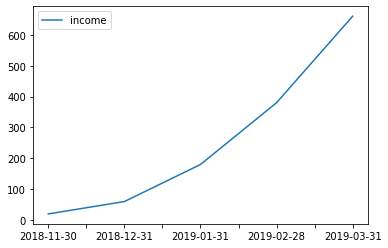

In [252]:
income_df.plot()

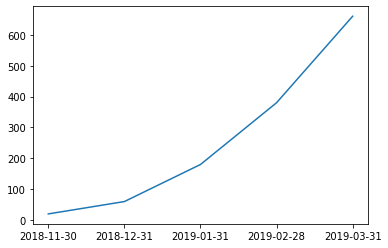

In [246]:
plt.plot(income_df.index, income_df.income)
plt.show()

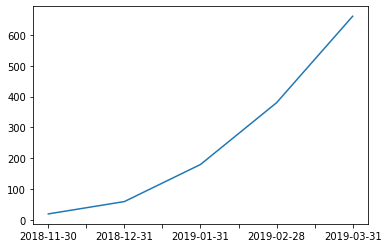

In [248]:
income_df.income.plot()
plt.show()

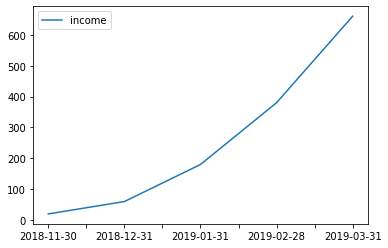

In [250]:
income_df.plot(kind='line')
plt.show()

<AxesSubplot:>

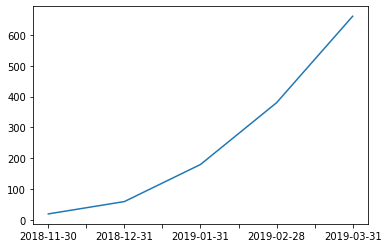

In [251]:
income_df['income'].plot()

<AxesSubplot:>

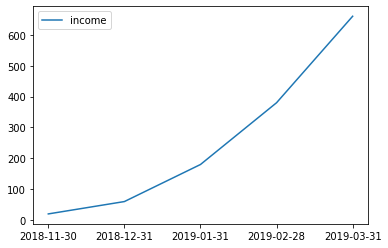

In [253]:
sns.lineplot(data=income_df)

<AxesSubplot:ylabel='income'>

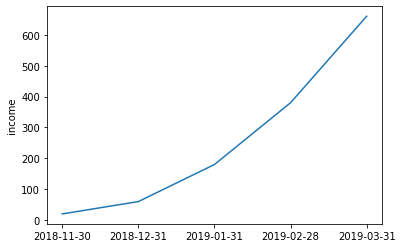

In [254]:
sns.lineplot(x=income_df.index, y=income_df.income)

In [ ]:
#1.7.2  Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.